<a href="https://colab.research.google.com/github/m123m12/Netflix-movies-and-TV-shows-clustering/blob/main/Netflix_movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Netflix movies and TV shows clustering(Unsupervised ML)**

**Name        : GRANDHI MADHAVA NAIDU**

Github link: https://github.com/m123m12/Netflix-movies-and-TV-shows-clustering

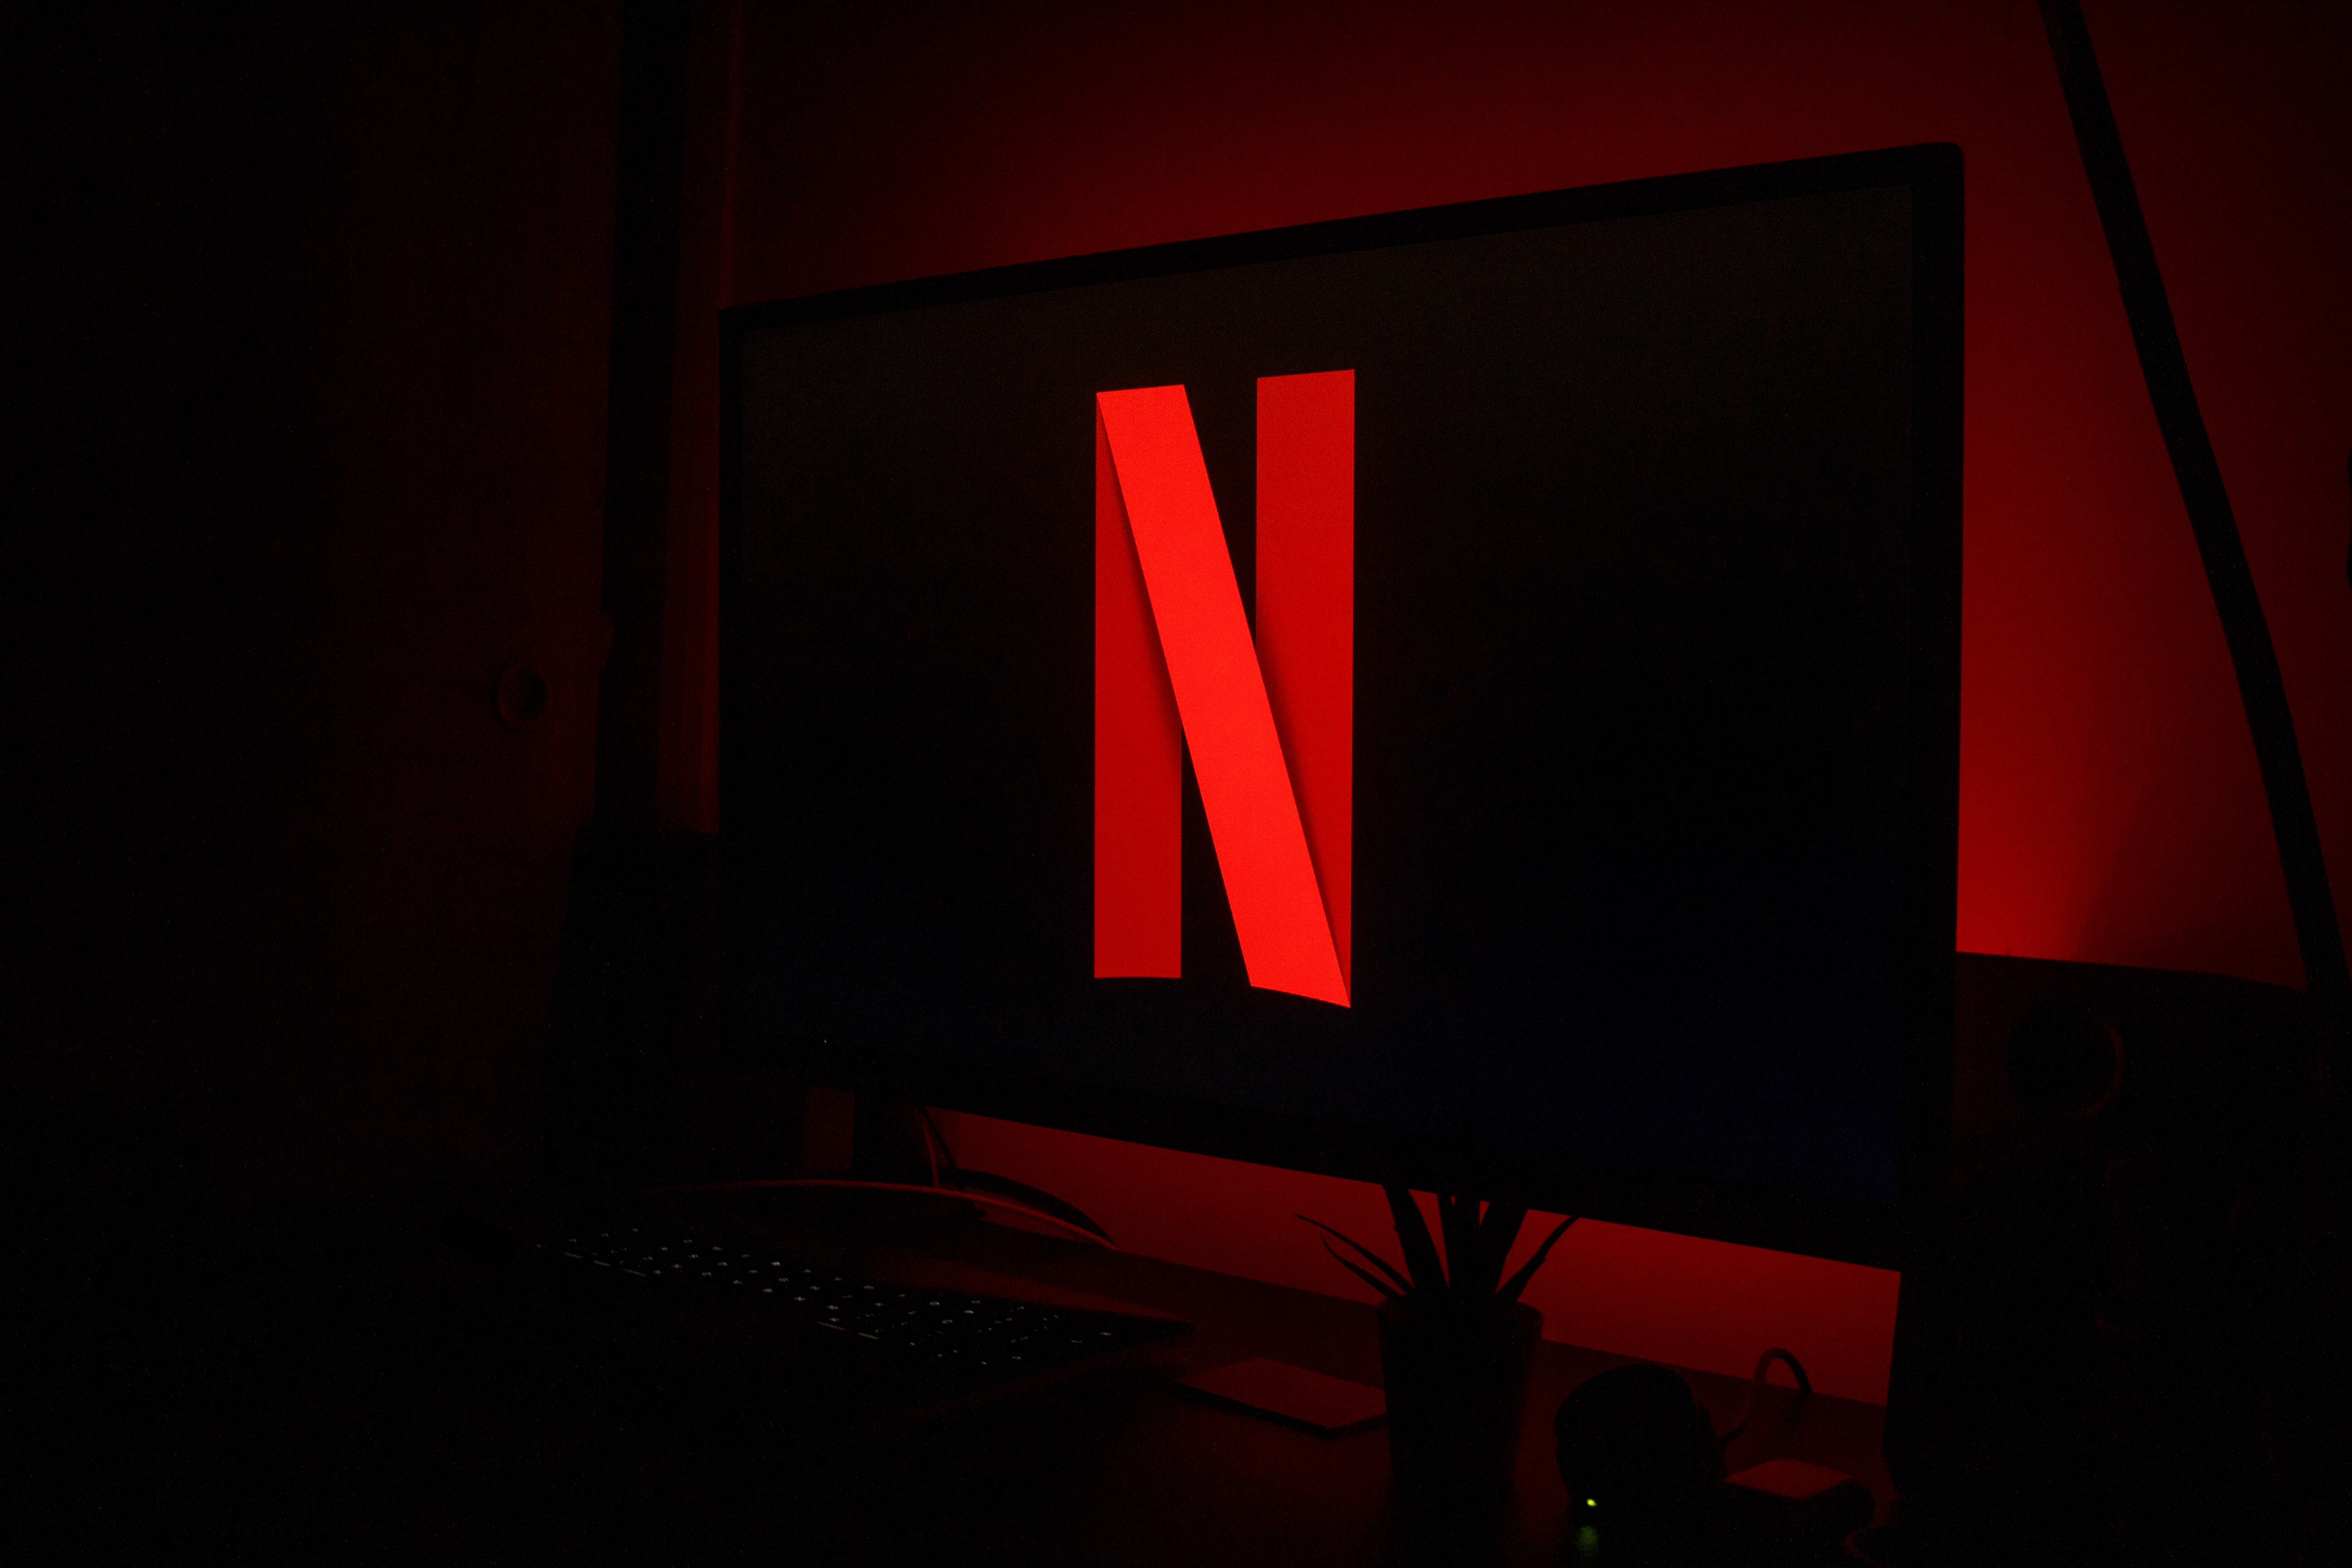

**Project Description:**

**Business context:**

This data set consists of TV shows and movies available on Netflix as of 2019.The dataset is collected from flixable which is a third party Netflix search engine. In 2018 ,they released an iteresting report which shows that number of TV shows on Netflix has nearly tripled since 2010.The streaming services number of movies has decreased by more than 2000 titles since 2010,while its number of TV shows has neaerly tripled.It will be interesting to explore what all other insights can be obtained from the same dataset.

**Busines objective:**

In this project dataset consists of tv shows and movies available on Netflix as of 2019.The aim of this project is to find clusters.In this project, required to do: (1)Exploratory Data Analysis, (2) Understanding what type content is available in different countries, (3) Is Netflix has increasingly focusing on TV rather than movies in recent years, (4) Clustering similar content by matching text-based features.

**Data description:**

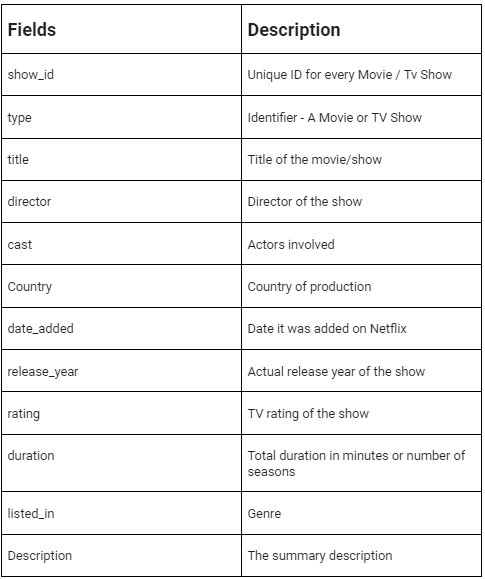

**Importing required libraries:**

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.graph_objects as map
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
     

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**Mounting the Google drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Dataset loading**

In [ ]:
netflix_data=pd.read_csv("/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
#check the information of the dataset
netflix_data.info()

In [ ]:
#check the description of the dataset
netflix_data.describe(include='all')

In [ ]:
#check the first five rows of the dataset
netflix_data.head()

In [ ]:
#check the last five rows of the dataset
netflix_data.tail()

**Duplicate values:**

In [ ]:
#check the duplicate values in the dataset
len(netflix_data[netflix_data.duplicated()])

**Missing values:**

In [ ]:
# Missing Values/Null Values Count
netflix_data.isnull().sum().sort_values(ascending=False)

2389 nulls in 'director'

718 nulls in 'cast'

507 nulls in 'country'

10 nulls in 'date_added'
7 nulls in rating

In [ ]:
#check the null value distribution
null_counts = netflix_data.isnull().sum()/len(netflix_data)
plt.figure(figsize=(12,6))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='vertical')
plt.ylabel('Fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()
     


In [ ]:
#check the shape of the dataset
netflix_data.shape

In [ ]:
#check the columns in the dataset
netflix_data.columns

In [ ]:
# Check Unique Values for each variable.
netflix_data.nunique()

**What did you know about your dataset?**

The dataset given is a dataset of TV Shows and Movies available on Netflix as of 2019. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

From this dataset we have to find Exploratory Data Analysis, Understanding what type content is available in different countries, Is Netflix has increasingly focusing on TV rather than movies in recent years and Clustering similar content by matching text-based features.

The above dataset has 7787 rows and 12 columns. There are some mising values so we need to handle the null values but no duplicate values in the dataset.The columns that have missing values are as follows: (1)director (2)cast (3)country (4)date_added (5)rating.

**Data wrangling:**

In [ ]:
# Create a copy of the current dataset and assigning to data
data=netflix_data.copy()

# Create two data frames saperate one contains the TV Show data and second one contains the Movie data
netflix_tv=data[(data['type']=="TV Show")]
netflix_movie=data[(data['type']=="Movie")]
     

In [ ]:
# convert object data to int (for purpose of classification)
netflix_movie['duration']=netflix_movie['duration'].str.replace(' min','')
netflix_movie['duration']=netflix_movie['duration'].astype(str).astype(int)

# convert object data to int (for purpose of classification)
netflix_tv['duration']=netflix_tv['duration'].str.replace(' Seasons','')
netflix_tv['duration']=netflix_tv['duration'].str.replace(' Season','')
netflix_tv['duration']=netflix_tv['duration'].str.replace('s','')
netflix_tv['duration']=netflix_tv['duration'].astype(str).astype(int)


In [ ]:
# create 3 dataframe which classify the movies in to three class
long_movie= netflix_movie[netflix_movie['duration'] >= 150]
av_time_movie= netflix_movie[ (netflix_movie['duration'] < 150) & (netflix_movie['duration'] > 100 )]
short_movie= netflix_movie[netflix_movie['duration'] <= 100]

print("Number of long movies are :",len(long_movie))
print("Number of Average time movies are :",len(av_time_movie))
print("Number of Short movies are :",len(short_movie))
     

In [ ]:
#changed date added to datetime object 
# convert "date_added" column in to datetime format
data["date_added"] = pd.to_datetime(data['date_added'])

# create two columns year and month for analysis purpose.
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

In [ ]:
# get unique catogorties for classification

data["rating"].unique()

In [ ]:
#Assigning the Ratings into grouped categories

ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)

# Find the which is the target audiance for any program.
data["target_ages"].value_counts()
     

In [ ]:
# create dataframe for getting the name of actors

actor_data=data["cast"].fillna('')
actor_data.isnull().sum()

In [ ]:
# fuction for count actor name
def convert_to_list(df):
  cast_count = {}
  cast_count_final = []
  cast_list = list(actor_data)
  for i in range(len(cast_list)):
    cast_count_final.extend(str(cast_list[i]).split(","))
  for i in cast_count_final:
    if i not in cast_count:
      cast_count[i] = cast_count_final.count(i)
  return cast_count

In [ ]:
cast_data = convert_to_list(data)
casts_data = pd.DataFrame.from_dict(cast_data, orient='index', columns=['count'])

#highest number movie for actors
casts=casts_data.sort_values('count', ascending=False).drop('').reset_index()
casts
     

In [ ]:
#create dataframe for getting the name of genre

genre=data["listed_in"]
     

In [ ]:
# fuction for count the genre name

def convert_to_list(netflix_data):
  genre_count = {}
  genre_count_final = []
  genre_list = list(genre)
  for i in range(len(genre_list)):
    genre_count_final.extend(str(genre_list[i]).split(","))
  for i in genre_count_final:
    if i not in genre_count:
      genre_count[i] = genre_count_final.count(i)
  return genre_count

In [ ]:
genre_df = convert_to_list(data)
genre_df = pd.DataFrame.from_dict(genre_df, orient='index', columns=['count'])

#highest number genres
genre_df.sort_values('count', ascending=False)

I have done many manipulation in data. First I created two dataframe on the basis of TV Show and Movies , this is because of I want to classify the Movies in to three catogories Long, Average and Short time movies.
Second one is, I created new column in which I categoried the rating.From this I found that targeted audience is Adults.

   Third one is, change the datatype of "data_added" column for analysis and also created two separate columns for further analysis Year and Months.

Other one is, I created two functions and got top actors and genres from the data

## **Data Visualisation:**

In [ ]:
#Function to plot countplot
def count_plot(col, netflix_data, Order = None):
  '''This function plots the count plot for the passed feature
     Pass column name (str), Pandas DataFrame, Order (list of indexes) to plot the graph.'''
  plt.figure(figsize = (20,7))
  plt.title(f'Count plot of {col}')
  sns.countplot(x=col, data=netflix_data, order= Order)
  plt.xticks(rotation = 90)
  plt.show()

countplot will be used for the better visuallization of the observational counts of the categorical variable.

In [ ]:
#Function to plot Pie chart
def pie_chart(col):

  plt.rcParams['font.size'] = 12
  plt.figure(figsize = (7,7))
  exp = (0.05,)*len(netflix_data[col].value_counts())
  netflix_data[col].value_counts().plot.pie(autopct = '%1.1f%%', explode = exp)
  plt.title(f'percentage distribution of {col}')
  plt.axis('off')
  plt.show()

Pie charts are very much useful in displaying relative proportions of multiple classes of data.

In [ ]:
def col_word_cloud(col, w_df):
  ''' This function will show the WordCloud for the passed feature'''
  plt.figure(figsize = (15,7))
  text = " ".join(word for word in w_df[col])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

WordClouds offer a visible picture of text data.

**EXPLORATORY DATA ANALYSIS:**

**UNIVARIATE ANALYSIS:**

**chart-1(TV shows v/s movies):**

In [ ]:
# Chart - 1 visualization code
pie_chart("type")

Here we get information that this dataset contains 5377 rows for Movies which is 69.1% and 2410 rows for TV Show which is 30.9%.
           From the given data we can say that the data given here is more about Movies. It is impact on clustering.From this chart we can take further decisions because this chart shows Movies are watched more than TV shows on Netflix.With its reference we can decide the next strategy.

**Chart-2**

In [ ]:
# Chart - 2 visualization code
col_word_cloud('title',netflix_data)

 A word cloud is a visual representation of text data using color and font size to represent the frequency of a term or topic. Wordcloud visualizations make it easy to read and understand the most prominent terms.

  It seems like words like "Christmas","Love", "Man", "World", "Story" are very common in titles.

  From this chart we can know which words occurs many times in the data.From this we can predict that what kind of data and and which type of titles for the TV Shows and Movies.

A major disadvantage here that we cannot draw any definite conclusion because it works on the frequency of the work.

**chart-3**

In [ ]:
# Chart - 3 visualization code
#Directors having most counts of movies
netflix_data[netflix_data['director']!= 'Unknown']['director'].value_counts().head(20)

In [ ]:
#Plotting the bar graph for top 10 directors who have most number of shows/movies in the dataset.
count_plot('director', netflix_data, netflix_data[netflix_data['director']!= 'Unknown']['director'].value_counts().head(10).index)
     

From the bar plot we found top 10 Directors with most number of Movies/Shows on Netflix.

From this information we can get better transparency on the bussiness. This information is very important for bussiness. From this information we can know that what is the contribution of which director in Entertainment field and also we can know that which director makes how many films and TV shows.

**chart-4**

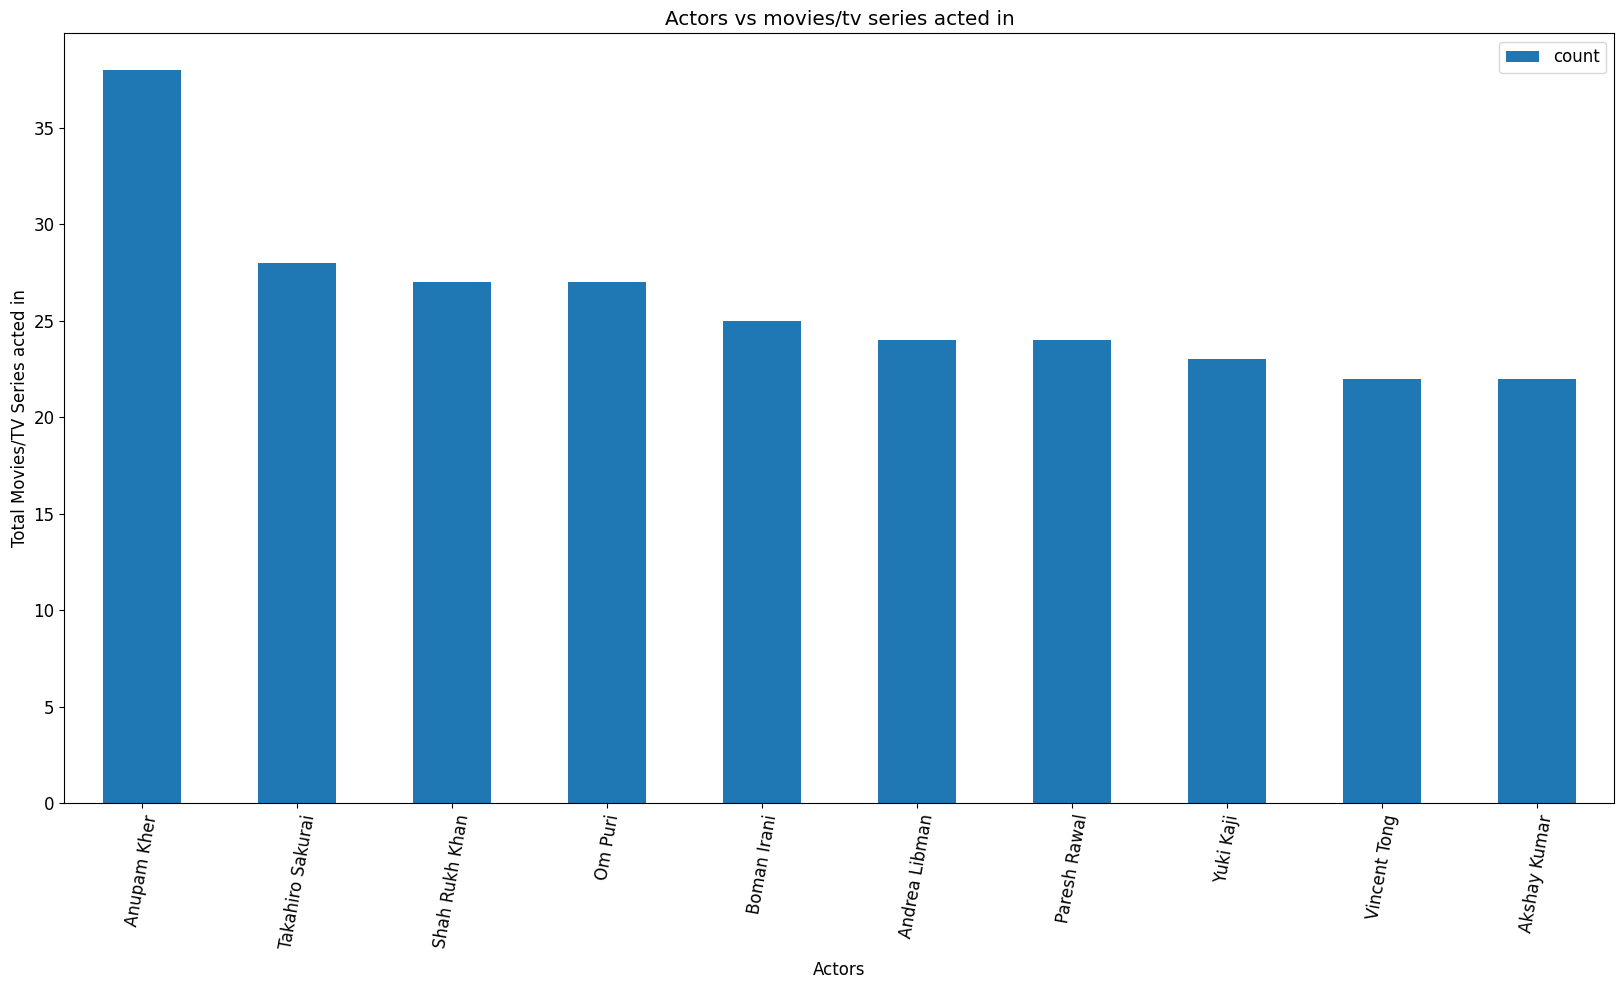

In [ ]:
# Chart - 4 visualization code
# use the data frame which is created in data wrangling part.
casts_data.sort_values('count', ascending=False).drop('')

# plot for top actors and count

plt.rcParams["figure.figsize"] = (20, 10)
casts_data.sort_values('count', ascending=False).drop('').head(10).plot(kind='bar') # here we drop '' because we use it instead of nan
plt.xlabel("Actors")
plt.ylabel("Total Movies/TV Series acted in")
plt.title("Actors vs movies/tv series acted in")
plt.xticks(rotation=80)
plt.show()
     

I found many information from this graph. I found that Top Actors with highest count of Movies/TV Shows on Netflix. Top actor is Anupam Kher.This data shows Anupam Kher has worked 35-40 times.

This data (visulization) has a good effect in bussiness. From this information we can say that being a top actor, Anupam Kher must be charging good money. From this data, we can also decide the budget of Movie and TV Shows. From this data we can say which actor is more active and more famous.

**chart-5**

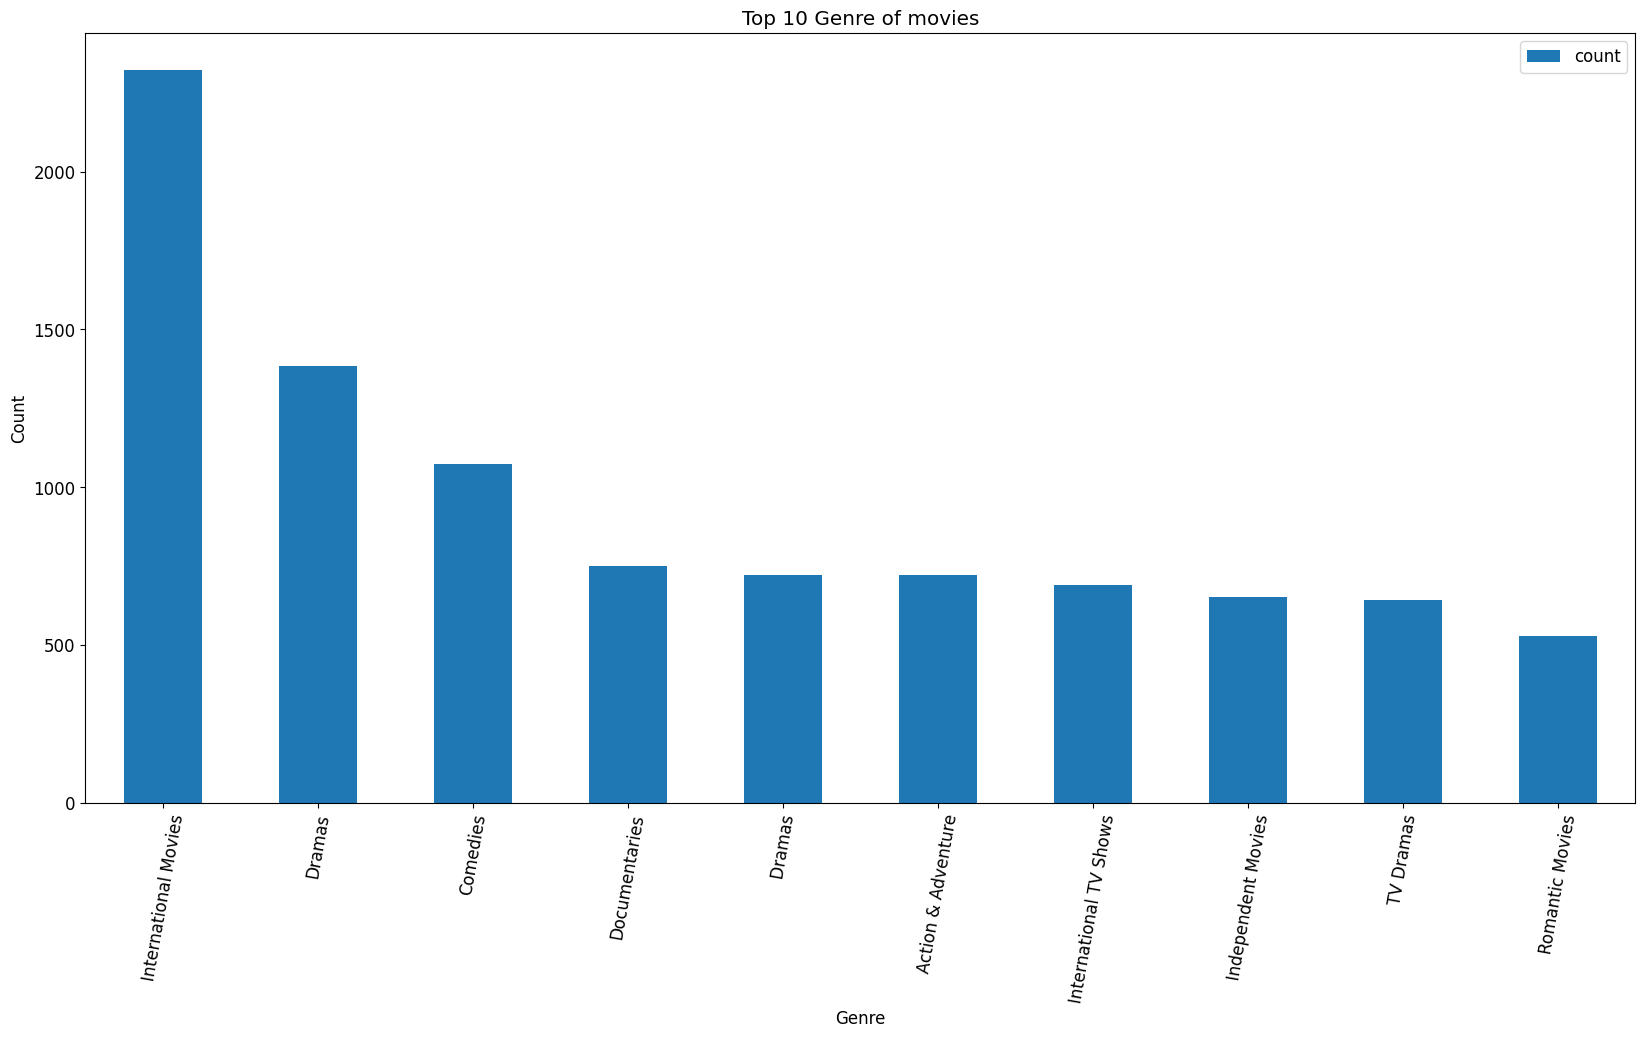

In [ ]:
# Chart - 5 visualization code
# use the data frame which is created in data wrangling part.
genre_df .sort_values('count', ascending=False)

# plot for top actors and count

plt.rcParams["figure.figsize"] = (20, 10)
genre_df .sort_values('count', ascending=False).head(10).plot(kind='bar') 
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Top 10 Genre of movies")
plt.xticks(rotation=80)
plt.show()

I found many information from this graph. I found that Top Genre withh highest count of Movies/TV Shows on Netflix. Top Genre is International Movies.This data shows International movies are more than 2000.

This data has a good effect in bussiness. From this information we can say that top genre is International Movies, People like such movies more as compare to others. From this data we can say what are other genres are more famous.

**chart-6:**

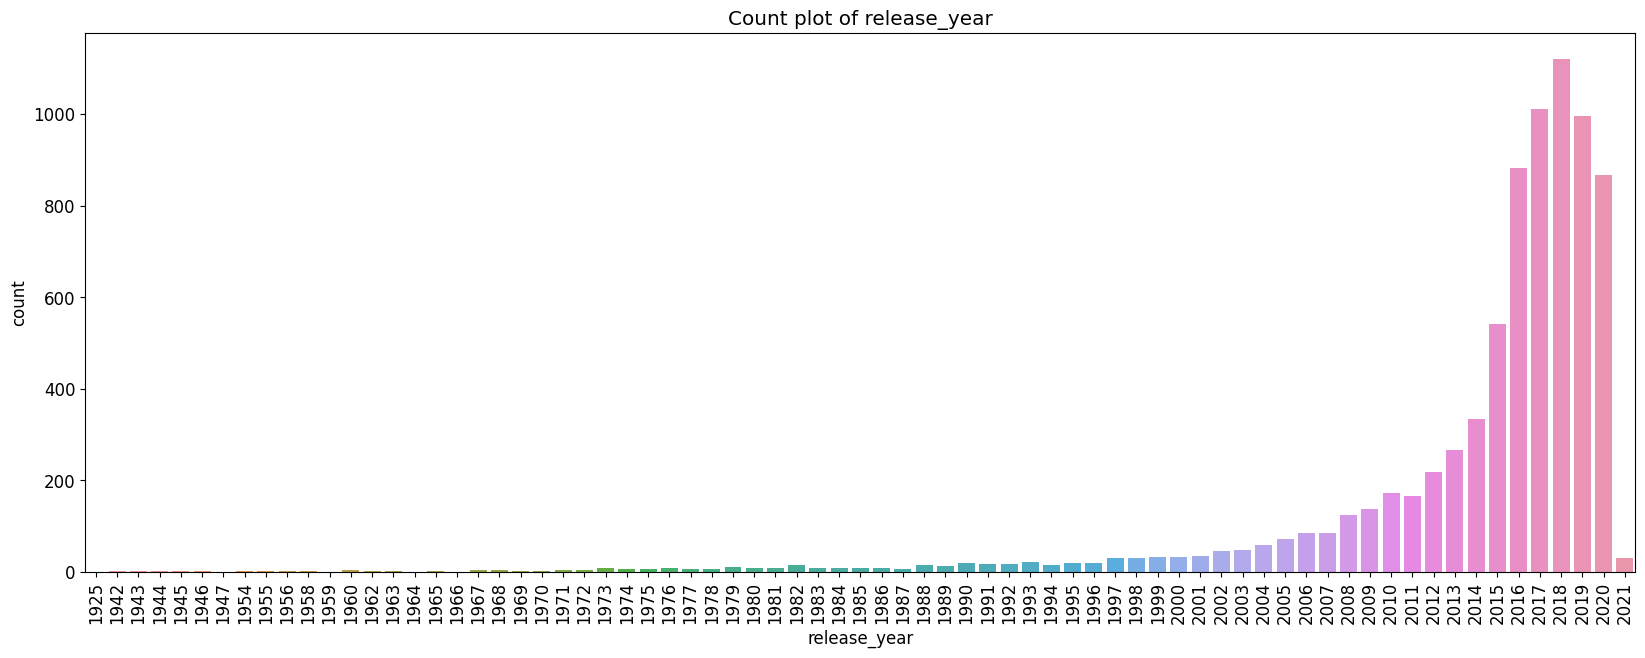

In [ ]:
# Chart - 6 visualization code
#Count plot for release year
count_plot('release_year',netflix_data)
     

We can see that there is a sudden rise in the number of TV shows and Movies from year 2010.

From above chart we can see that company is growing yearly in exponetial manner from 2010 to 2018 but there is decrease in 2019 and 2020 it show negative impact.

**chart-7:**

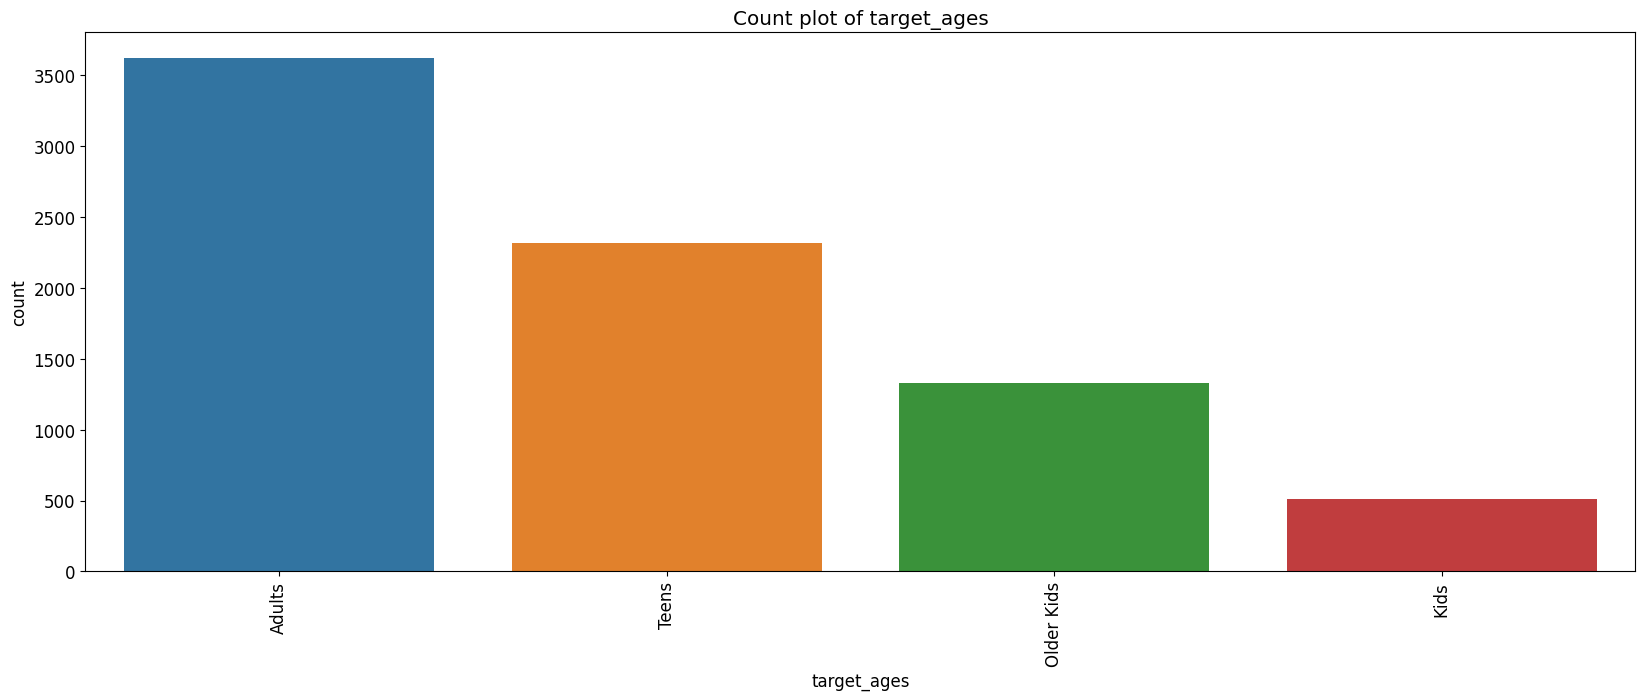

In [ ]:
# Chart - 7 visualization code
count_plot('target_ages', data)

From above graph we can see that the most targeted auduience is Adults then teens.

From the information we get, we can know what kind of content we should provide for company growth and business expansion.Majority of the audience here is adults so it can be known from here to give something that they like. We can take advertisements that are used by adults.

**chart-8 Duration Analysis(univariate analysis)**

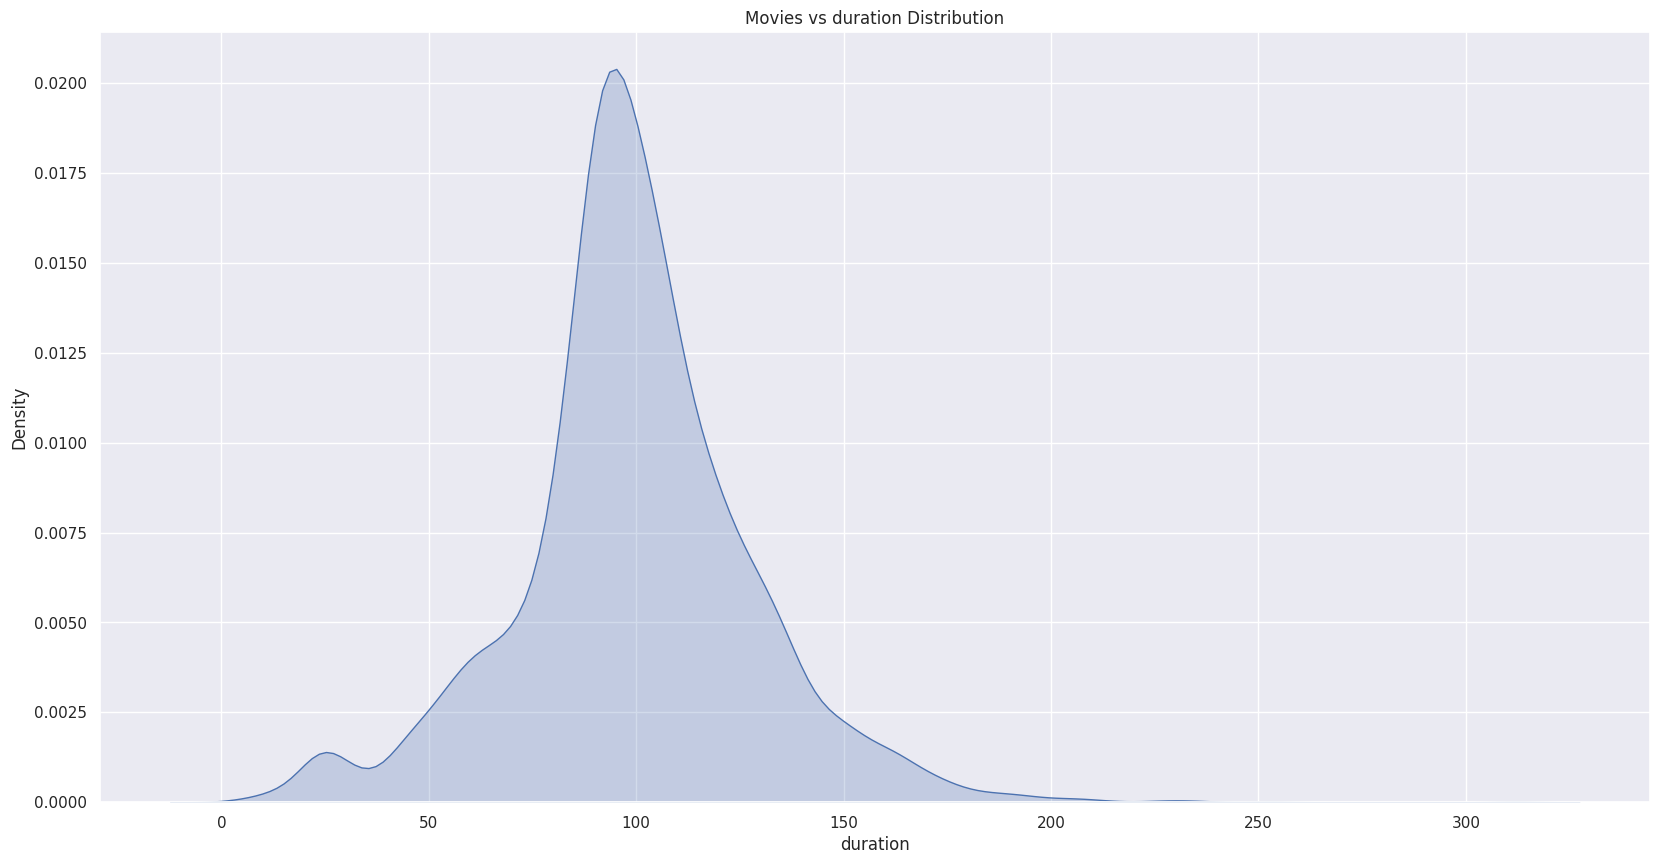

In [ ]:
# Chart - 8 visualization code
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movie['duration'], shade=True)
plt.title("Movies vs duration Distribution")
plt.show()

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

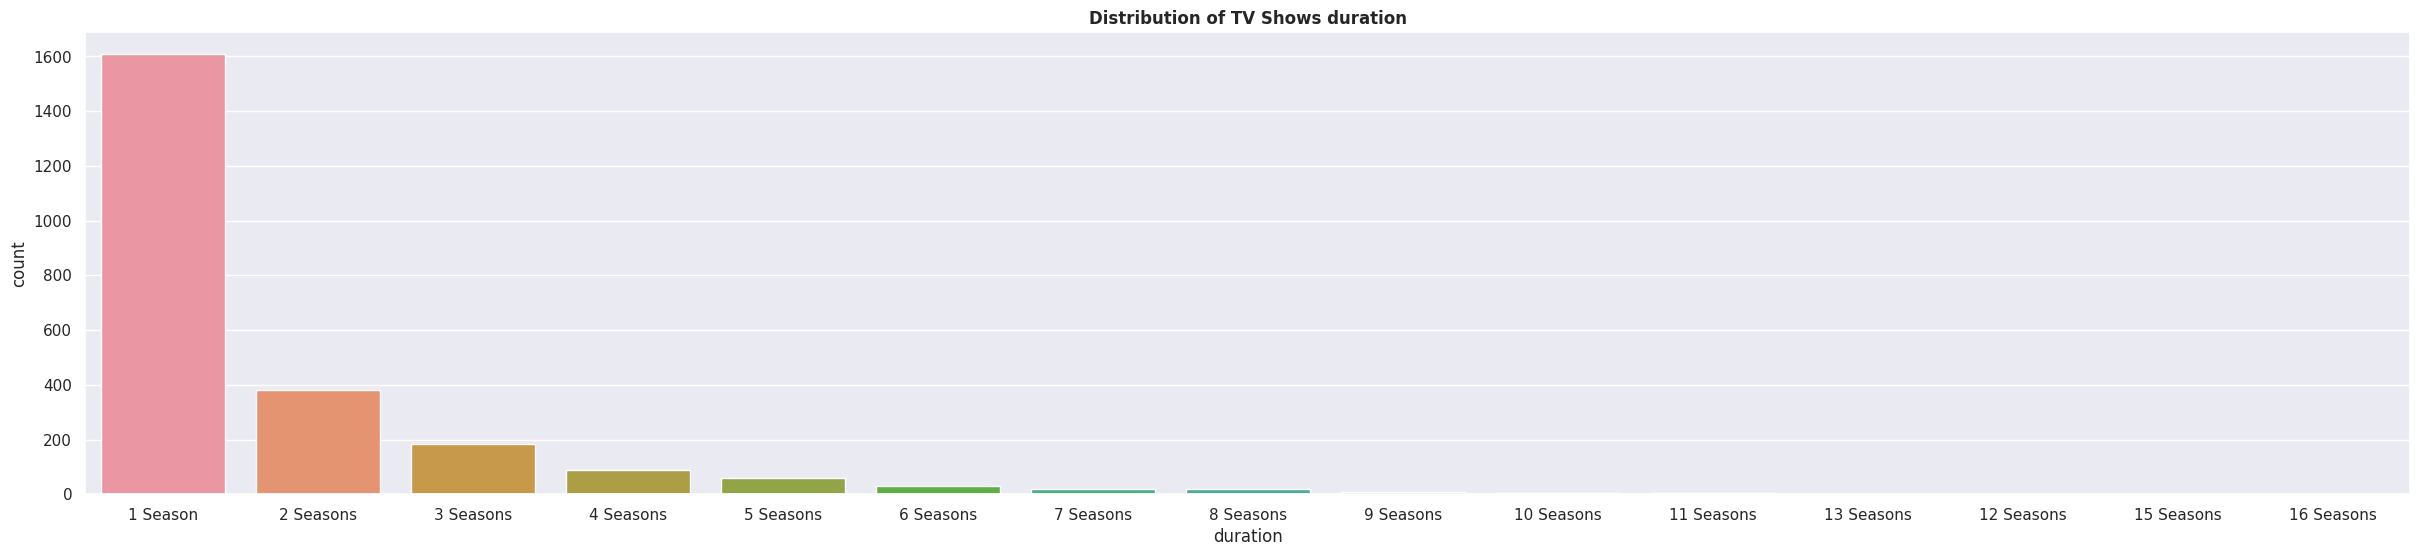

In [ ]:
df_tv_show=data[(data['type']=="TV Show")]
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=df_tv_show['duration'],data=df_tv_show,order = df_tv_show['duration'].value_counts().index)

From the first chart we can know that most content are about 70 to 120 min duration for Movies.

From the second chart we can know that most of the shows are 1 to 2 seasons long and other are less mostly 1 season.
The given duration data can be used by us in future.From the given information we can determine the moive and tv show duration to be produces in future.

**chart-9(Is Netflix has increasingly focusing on TV rather than movies in recent years)**

In [ ]:
#Extracting year wise TV Show & Movie added
yr_added_movie = data[data['type'] == "Movie"]['year_added'].value_counts().reset_index().sort_values(by = 'index')
yr_added_tv = data[data['type'] == "TV Show"]['year_added'].value_counts().reset_index().sort_values(by = 'index')
     

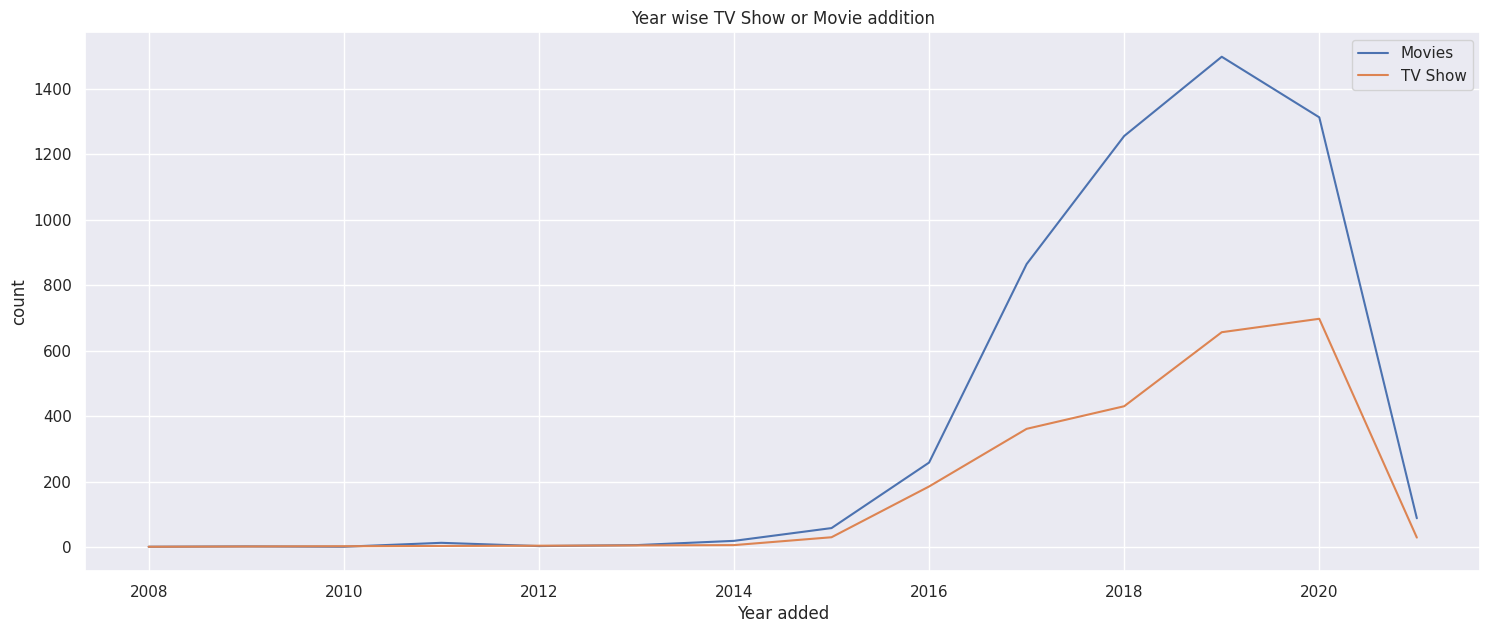

In [ ]:
#Plotting a line graph
plt.figure(figsize = (18,7))
plt.plot('index','year_added', data = yr_added_movie, label = 'Movies')
plt.plot('index','year_added', data = yr_added_tv, label = 'TV Show')
plt.title('Year wise TV Show or Movie addition')
plt.xlabel('Year added')
plt.ylabel('count')
plt.legend()
plt.show()

From the above graph also we can infer that number of movie addition has decresed after 2019 whereas number of TV Show addition has increased after 2019.

This shows that netflix is focusing more on TV shows.

**chart-10(Description word analysis for Tv Shows and Movies)**

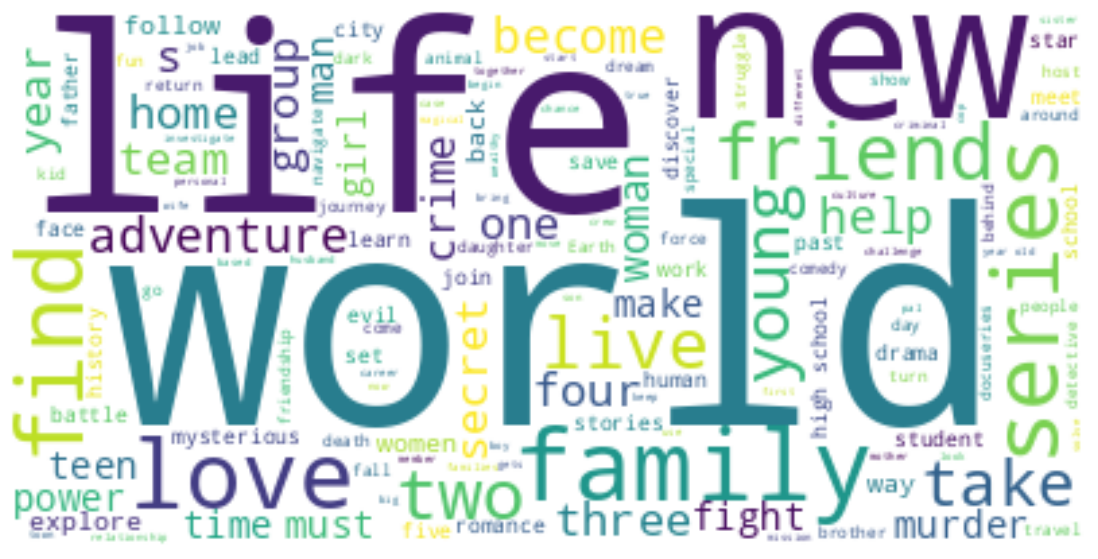

In [ ]:
# Visuallizing the wordcloud for description for TV Show
col_word_cloud('description', netflix_tv)


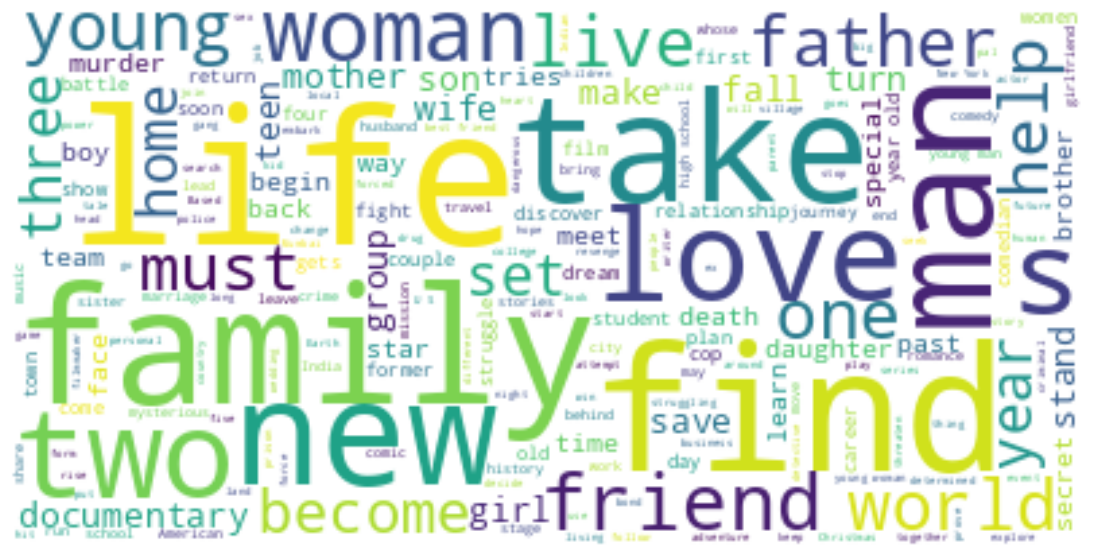

In [ ]:
# Visuallizing the wordcloud for description for TV Show
col_word_cloud('description', netflix_movie)
     

Description of TV Shows contains more words like world, life, family, new, find, love etc.

Description of Movie also contains more words like life, find, family, love etc similar to TV Shows.

It will help the bussiness for future movies and shows what are famous and important topics in audiencs.

**chart-11 Country Wise Trend Analysis ( Univariate + Bivariate Analysis)**

Top 10 Countries with more number of Productions
                  country vs genre,
                  country vs rating,
                  country vs type.


In [ ]:
#count of unique column
data.country.nunique()

681

In [ ]:
# Looking for countries and number of netflix productions

country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(netflix_data)):
  if type(data['country'][i])== str:
    split=data['country'][i].split(',')
    for k in split:
      country_list.append(k.strip())
      if data['type'][i]=='TV Show':
        tv_show.append(k.strip())
      if data['type'][i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))
     

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)

In [ ]:
#Top 10 countries
top_countries=country_df.head(10)
top_countries = top_countries[top_countries['country']!='']
top_countries

country  Productions  TV-Shows  Movies
0   United States         3297       866    2431
1           India          990        75     915
2  United Kingdom          723       256     467
3          Canada          412       126     286
4          France          349        84     265
5           Japan          287       184     103
6           Spain          215        57     158
7     South Korea          212       157      55
8         Germany          199        42     157
9          Mexico          154        53     101

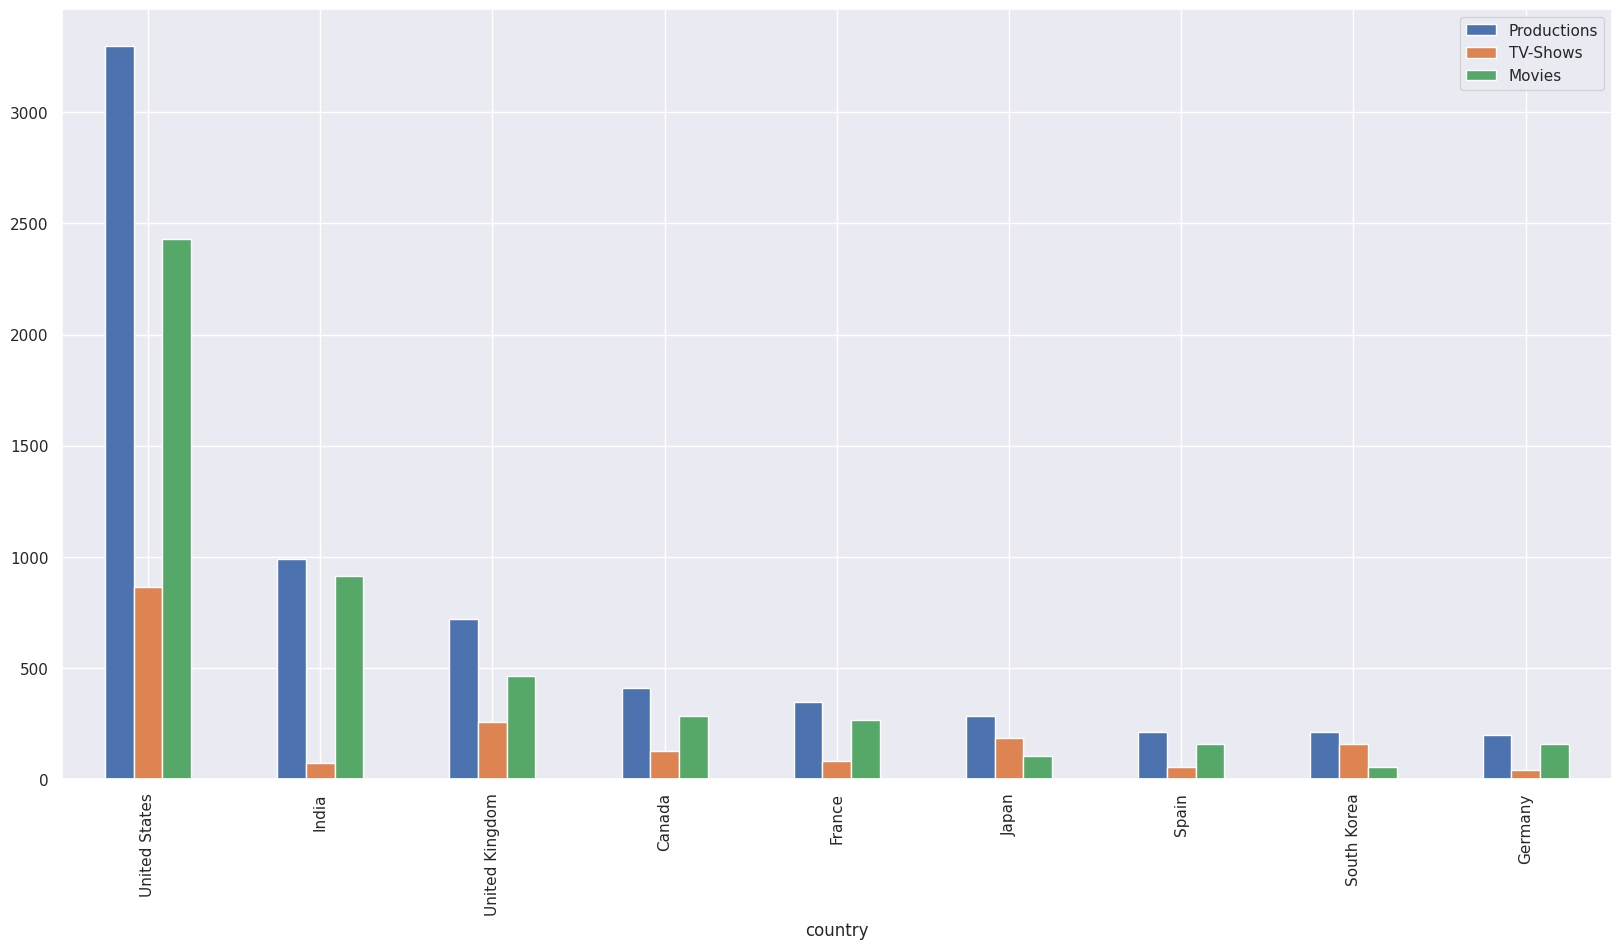

In [ ]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")
plt.show()

Above graph shows us top 10 countries in number of production. US has the highest number of production of movies and tv shows then india and Uk.

In [ ]:
#genre country wise
def get_genre_country_trends(data):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  data['country_list'] = data.apply(lambda x: explode_country(x['country']),axis=1)
  data = data.explode('country_list')
  data['genre_list'] = data.apply(lambda x: explode_country(x['listed_in']),axis=1)
  data = data.explode('genre_list')
  data.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df_ = data.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).head(10).plot.bar(x = "genre_list", y="title", color="skyblue", rot=90, figsize=(9,5))
    plt.title(f"{each}")
  return rating_country_df

In [ ]:
rating_country_df = get_genre_country_trends(data)

This chart shows that which country prefer which type of entertainment program. Above list of graphs clearly shows the country wise listing for each country. We can draw lots of useful insights from the above graphs -

Most of the countries like Brazil, Mexico, Turkey, Egypt, India etc have produced more International Movies.
Countries like Singapore, Japan, South Korea etc have produced more International TV Shows as compared to other genres.
Contries like US, Poland, iceland Dramas are most produced genre.
UK is producing more British TV shows.
Canada have produced most comedies genre shows/movies.

In [ ]:
#getting country wise rating trend
def get_country_ratings_trends(data):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  data['country_list'] = data.apply(lambda x: explode_country(x['country']),axis=1)
  data= data.explode('country_list')
  grouped_df_ = data.groupby(['country_list','rating']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "rating", y="title", color="khaki", rot=45, figsize=(5,5))
    plt.title(f"{each}")
     


In [ ]:
get_country_ratings_trends(data)
     

Above chart shows that which country has which type of genres. Above list of graphs clearly shows the country wise listing in each content rating. We can draw lots of useful insights from the above graphs -

Countries like Brazil, Mexico, United States, Turkey, Egypt, Poland, United Kingdom, Canada etc have produced more number of adult content movie/shows.
Countries like India, Singapore, Egypt, Nigeria, Indonesia, Hong Kong etc. are producing more contents which can be consumed by children above 14yrs age.

In [ ]:
#get all country type preference
def get_country_type_trends(data):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  data['country_list'] = data.apply(lambda x: explode_country(x['country']),axis=1)
  data = data.explode('country_list')
  grouped_df_ = data.groupby(['country_list','type']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "type", y="title", color="salmon", rot=45, figsize=(5,5))
    plt.title(f"{each}")
     


In [ ]:
get_country_type_trends(data)
     

This chart shows Which country has which type of rating. Above list of graphs clearly shows the country wise content type listings. We can draw lots of useful insights from the above graphs -

Most of the countries have produced more movies than TV Shows.
Countries like Singapore, Japan, South Korea, Taiwan, Russia, Mauritius etc. have produced more TV shows than movies.
Mauritius, Syria, Cuba have produced only TV Shows.

** Is number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled?**

In [ ]:
#Number of TV shows & Movies till 2010
data[data['year_added'] <=2010]['type'].value_counts()

In [ ]:
#Number of TV shows & Movies till 2017
data[data['year_added'] < 2018]['type'].value_counts()
     

In [ ]:
#Now let's check the Movie and TV count from 2019 to 2021.
data[data['year_added'] >= 2018]['type'].value_counts()
     

The above data shows that number of movies have increased from 1225 to 4152 from year 2017 to year 2021 number of movies has not decreased as shown in the report.
The number of TV Shows have increased from 588 in 2017 to 1812 in 2021. Number of TV Shows have increased more than three times. This statement is truely mentioned in the report.

**Feature Engineering & Data Pre-processing:**

**Handling missing values:**

In [ ]:
data.isnull().sum().sort_values(ascending=False)

There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column, 10 in date_added (month_added,year_added) and 7 in rating(7 target_ages). so we need to handle the null values.

In [ ]:
# Handling Missing Values & Missing Value Imputation

#Dropping Director Column

data.drop(['target_ages','year_added','month_added','date_added'],axis=1,inplace=True)   # Here we drop these columns because we add these for analysis.

data['cast'].fillna(value='No cast',inplace=True)
data['country'].fillna(value=data['country'].mode()[0],inplace=True)
data['director']=data['director'].fillna('')
data['rating'].fillna(value=data['rating'].mode()[0],inplace=True)


In [ ]:
data.isnull().sum().sort_values(ascending=False)

Deletation of columns having null : Here First of all, the columns that are created for analysis are removed.

Use Appropriate Word : Here for 'cast' and 'director' columns we fill the null values with empty space ' '. Because we can not define which movie or TV Shows directed or casted by whom.

Use most accurring word : Here for 'country' and 'rating' columns we fill the null values with most accurring word . Because probability of belonging to that country and that rating group is more.

**Handling outliers:**

In [ ]:
# Handling Outliers 
plt.boxplot(netflix_movie['duration'])
plt.show()

In [ ]:
# box plot for tv show duration
plt.boxplot(netflix_tv["duration"])
plt.show()

Here these feature have some outliers. In "movie duration" column we have a major number of ponits in the outer range of box plot but we don't consider as an outlier because it is a large number and also this coulmn will not be included to get the result (Clustering).

In "show duration" column has less number of outliers so no need to do any treatment .

**Data pre processing:**

**Modelling approach:**
1.Select the attributes based on which you want to cluster the shows

2.Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase.

3.Lemmatization to generate a meaningful word out of corpus of words
Tokenization of corpus
4.Word vectorization
5.Dimensionality reduction
6.Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7.Build optimal number of clusters and visualize the contents of each cluster using wordclouds.
8.We will cluster the shows on Netflix based on the following attributes:

Director
Cast
Country
Listed in (genres)
Description
Rating

In [ ]:
# Using the original dataset for clustering 
df1 = netflix_data.copy()

In [ ]:
df1.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description']+' '+df1['rating'])

In [ ]:
df1['clustering_attributes'][20]

We have successfully added all the necessary data into a single column

**Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])
     

In [ ]:
df1['clustering_attributes'][20]

We have successfully removed all non-ascii characters from the corpus.

**Remove stopwords and lower case:**

In [ ]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)
     

In [ ]:
df1['clustering_attributes'][20]

We have successfully removed all the stopwords and converted the corpus to lowercase.

**Remove punctuations:**

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
     

In [ ]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)
     

In [ ]:
df1['clustering_attributes'][20]

We have successfully dropped all the punctuation marks from the corpus.

**Lemmatization:**

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])
     

In [ ]:
df1['clustering_attributes'][20]

We have lemmatized the corpus.

**Tokenization:**

In [ ]:
tokenizer = TweetTokenizer()

In [ ]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))
     

The corpus is converted to tokens.

**Vectorization:**

We use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

We use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

In [ ]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)
     

In [ ]:
# Shape of X
X.shape
     

In [ ]:
# data type of vector
type(X)

In [ ]:
# convert X into array form for clustering
X = X.toarray()

**Dimensionality reduction using PCA:**

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [86]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

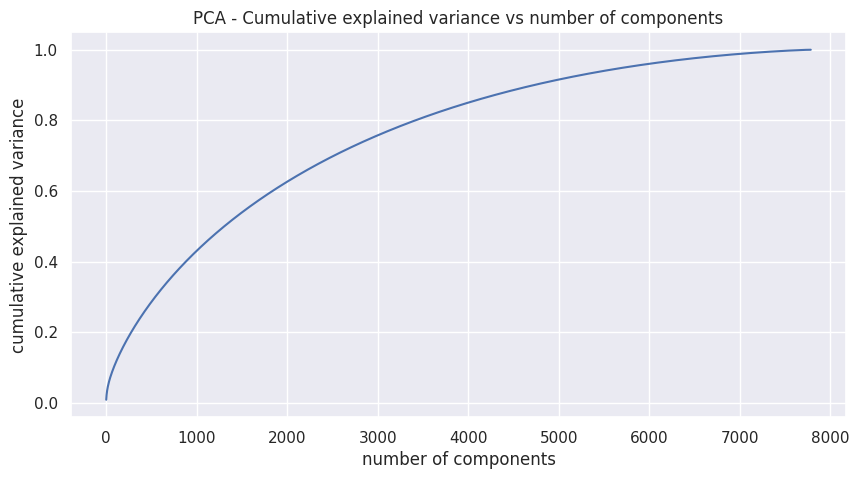

In [87]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
     

* More than 80% of the variance is explained just by 3500 components.

* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [88]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=3500,random_state=42)
pca.fit(X)

PCA(n_components=3500, random_state=42)

In [90]:
# transformed features
x_pca = pca.transform(X)

In [91]:
# shape of transformed vectors
x_pca.shape
     

(7787, 3500)

In [92]:
len(pca.explained_variance_ratio_)
     

3500

In [93]:
pca.explained_variance_ratio_.sum() 

0.802552628088853

Here we use Pricipal Component Analysis (PCA) Technique for dimensionality reduction.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns.